

# Project: Investigate No-show Appoinment dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will investigate a dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. In our investigation we will answer the following questions in order to determine if some factors affect whether or not a patient will make it to his appointment:
><li><a href="#q1">Does age affect whether the patient attends or not?</a></li>
><li><a href="#q2">Are no-shows more common for a specific gender?</a></li>
><li><a href="#q3">Are no-shows more common in a certain disease?</a></li>
><li><a href="#q4">Does sending sms messages result in fewer No-shows?</a></li>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading dataset 
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Inspecting dataset:
> **1- Will begin by checking the data types to make sure it was appropriately assigned**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>**2- All columns have appropriate datatypes, we can see that No-show column name needs adjusting so we will be doing that next**

In [4]:
df=df.rename(columns={'No-show':'No_show'})
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')


>**3-We can see from the info() function above that there is no missing values so we will proceed by Checking to see if there any duplicate rows**

In [5]:
sum(df.duplicated())

0

>**4- Now we can drop the columns that we don't need for our analysis**

In [6]:
df=df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','Scholarship'])
df.head(2)

,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,1,0,0,0,0,No
1,M,56,0,0,0,0,0,No


# Explatory data analysis
> Now we will answer the questions presented earlier
<a id='q1'></a>

## *1- Does Age affect whether the patient attend or not?*

In [7]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

> **We can see that there a '-1' entry in the Age coulmn which is not possipole so next we will locate it and drop this row from dataset**

In [8]:
invalid_input=df.query('Age == -1').index
df.drop(index=invalid_input,inplace=True)
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [9]:
# in order to examine the Age column against the No_show column first we will need to slice the column into show and noshow
show = df['No_show'] == 'No'
noshow = df['No_show'] == 'Yes'

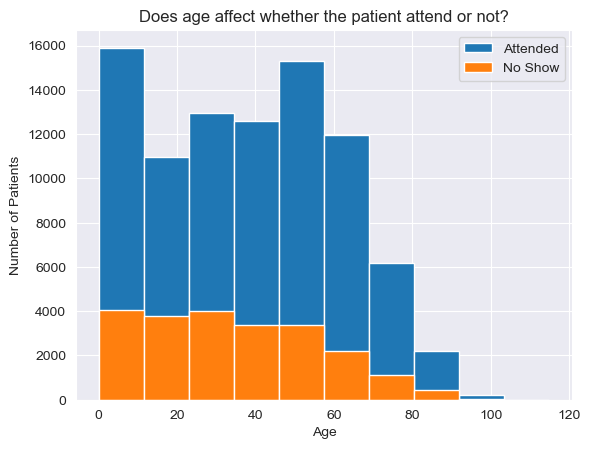

In [10]:
df['Age'][show].hist(label = 'Attended')
df['Age'][noshow].hist(label = 'No Show')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Does age affect whether the patient attend or not?')
plt.legend()
plt.show();

### Findings:
>**We can see from the above graph that age does not affect whether the patient attend his scheduled appoinments or not**

<a id='q2'></a>
## *2- Are no-shows more common for a specific gender?*
> For this quetion we will need to calculate the porportion of male and female patients who attednd and who did not.

In [11]:
#all columns have the same count so we will use the Age column for slicing 
gender_count=df.groupby(['Gender','No_show']).count()['Age']
gender_totals=df.groupby('Gender').count()['Age']

In [12]:
female_porp=gender_count['F']/gender_totals['F']
male_porp=gender_count['M']/gender_totals['M']

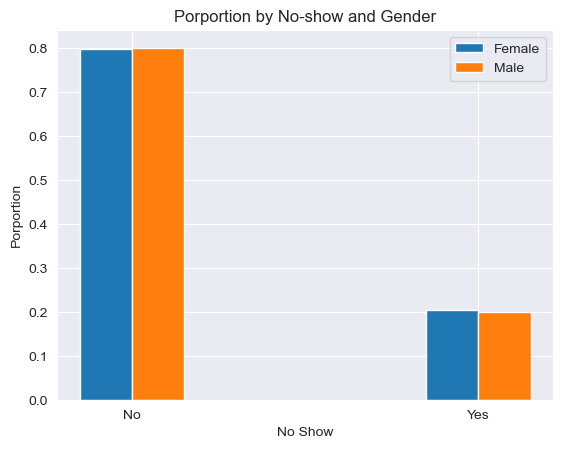

In [13]:
ind=np.arange(len(female_porp))
width=0.15
f_bars=plt.bar(ind,female_porp,width,label='Female')
m_bars=plt.bar(ind+width,male_porp,width,label='Male')
plt.ylabel('Porportion')
plt.xlabel('No Show')
plt.title('Porportion by No-show and Gender')
locations = ind + width / 2
labels=['No','Yes']
plt.xticks(locations, labels)
plt.legend()
plt.show();

### Findings:
>**We can see from the graph that the proportion of female and male who did not show up is very close nearly identical**



<a id='q3'></a>


## *3- Are no shows more common in a certain disease*
> For this question we will calculate the porportion of Hipertension, Handcap, Diabetes and Alcholism against the No-show column.to make the process of getting these porportions easier we will define a new function to help us with that. 

In [14]:
def disease_porp(col_name):
    """""""""""
    Purpose: to calculate the porportion of the disease columns against the No_show column
    Instruction: the col_name must always be between single qutation marks
    Note: all columns have the same count so we will use the Age column for slicing 
    """""""""""
    col_count=df.groupby([col_name,'No_show']).count()['Age']
    col_totals=df.groupby(col_name).count()['Age']
    col_porp=col_count[1]/col_totals[1]
    return col_porp

In [15]:
diabetes_porp= disease_porp('Diabetes')
hiper_porp= disease_porp('Hipertension')
handcap_porp=disease_porp('Handcap')
alcoholism_porp=disease_porp('Alcoholism')

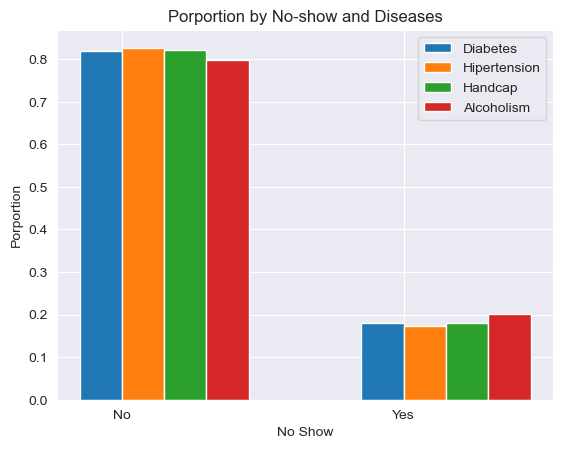

In [16]:
ind=np.arange(len(hiper_porp))
width=0.15
diabetes_bars=plt.bar(ind,diabetes_porp,width,label='Diabetes')
hiper_bars=plt.bar(ind+width,hiper_porp,width,label='Hipertension')
handcap_bars=plt.bar(ind+width*2,handcap_porp,width,label='Handcap')
alcoholism_bars=plt.bar(ind+width*3,alcoholism_porp,width,label='Alcoholism')

plt.ylabel('Porportion')
plt.xlabel('No Show')
plt.title('Porportion by No-show and Diseases')
locations = ind + width /2
labels=['No','Yes']
plt.xticks(locations, labels)
plt.legend()
plt.show();

### Findings:
>**We can see from the graph that the proportion of all the diseases is very close, the porportion of no-show alcholic patients is slightly higher than the rest but not enough to make a prediction**

### *Now we are going to take a closer look at the diseases columns, we will check to see if attendence of female and male patients with same disease differ.*

In [17]:
def dise_Gen_porp(col_name,boolen):
    '''''''''
    Purpose: calculate the porportion of no-show in male and female patients with the same disease
    instructions:
    - col_name must always be between single quotation marks
    - boolen is there to eliminate the patients who don't have the disease spciefied in col_name
    - boolen must take the following form:
      'col_name == 0' notice that the quotation marks envelops the whole expresssion and not the col_name
    Return: a tuple of (female_porp,male_porp )
    '''''''''
    new_df=df[['Gender','Age','No_show',col_name]].copy()
    healthy= new_df.query(boolen).index
    new_df.drop(index=healthy,inplace=True)
    gender_count=new_df.groupby(['Gender','No_show']).count()['Age']
    gender_totals=new_df.groupby('Gender').count()['Age']
    female_porp=gender_count['F']/gender_totals['F']
    male_porp=gender_count['M']/gender_totals['M']
    return (female_porp,male_porp)

In [18]:
diabetes_female=dise_Gen_porp('Diabetes','Diabetes == 0')[0]
diabetes_male=dise_Gen_porp('Diabetes','Diabetes == 0')[1]

handcap_female=dise_Gen_porp('Handcap','Handcap == 0')[0]
handcap_male=dise_Gen_porp('Handcap','Handcap == 0')[1]

hiper_female=dise_Gen_porp('Hipertension','Hipertension == 0')[0]
hiper_male=dise_Gen_porp('Hipertension','Hipertension == 0')[1]

alcoholism_female=dise_Gen_porp('Alcoholism','Alcoholism == 0')[0]
alcoholism_male=dise_Gen_porp('Alcoholism','Alcoholism == 0')[1]

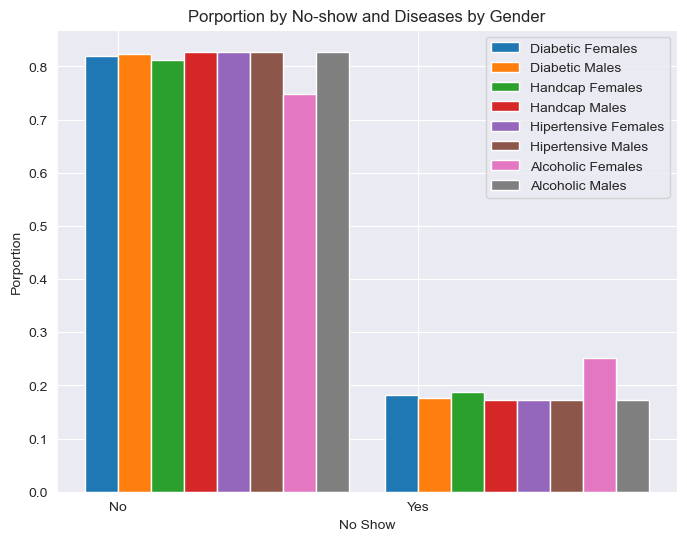

In [19]:

ind=np.arange(len(diabetes_female))
width=0.11

plt.figure(figsize = [8, 6])

diabetes_female_bars=plt.bar(ind,diabetes_female,width,label='Diabetic Females')
diabetes_male_bars=plt.bar(ind+width,diabetes_male,width,label='Diabetic Males')

handcap_female_bars=plt.bar(ind+width*2,handcap_female,width,label='Handcap Females')
handcap_male_bars=plt.bar(ind+width*3,handcap_male,width,label='Handcap Males')

hiper_female_bars=plt.bar(ind+width*4,hiper_female,width,label='Hipertensive Females')
hiper_male_bars=plt.bar(ind+width*5,hiper_male,width,label='Hipertensive Males')

alcoholism_female_bars=plt.bar(ind+width*6,alcoholism_female,width,label='Alcoholic Females')
alcoholism_male_bars=plt.bar(ind+width*7,alcoholism_male,width,label='Alcoholic Males')


plt.ylabel('Porportion')
plt.xlabel('No Show')
plt.title('Porportion by No-show and Diseases by Gender')
locations = ind + width /2
labels=['No','Yes']
plt.xticks(locations, labels)
plt.legend()
plt.show();

### Findings:
>In the previous graph we saw that porportion of no-shows in alcoholic patients were slightley elevated now we can attribute that elevation to female alcoholics:
>- The porportion of no show in female alcoholics is 0.25.
>- The porportion of no show in male alcoholics is 0.17.

<a id='q4'></a>
## *4- Does sending sms messages result in fewer No-shows?*

> To answer this question we will need to compare the following:
> - No show and attended for patients who did not received SMS reminder.
> - No show and attended for patients who received SMS reminder.

We will create a pie chart for each point for a more accurate insight

In [20]:
pateints_count=df.SMS_received.count()
col_count=df.groupby(['SMS_received','No_show']).count()['Age']
nosms_attended= col_count[0]['No']/pateints_count
nosms_noshow=col_count[0]['Yes']/pateints_count

sms_attended=col_count[1]['No']/pateints_count
sms_noshow=col_count[1]['Yes']/pateints_count

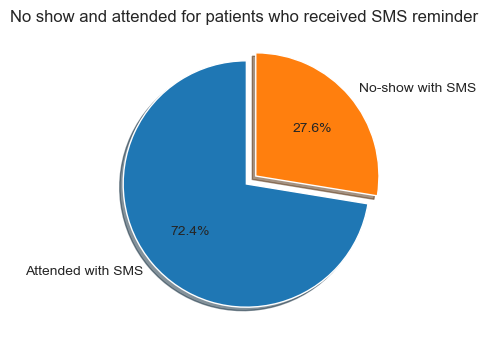

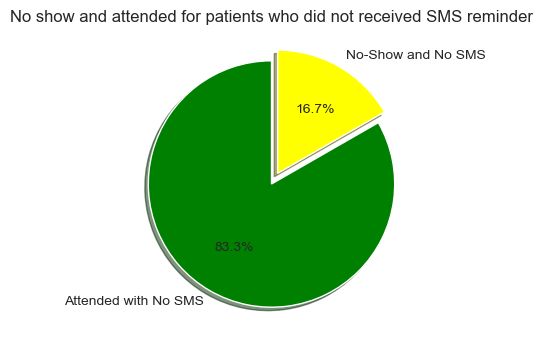

In [21]:
plt.figure(figsize = [4, 4])
sizes=(sms_attended,sms_noshow)
labels=['Attended with SMS','No-show with SMS']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,explode=(0,0.1),shadow=True);
plt.title('No show and attended for patients who received SMS reminder ')
plt.show();

plt.figure(figsize = [4, 4])
sizes=(nosms_attended,nosms_noshow)
labels=['Attended with No SMS','No-Show and No SMS']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=('green','yellow'),explode=(0,0.1),shadow=True);
plt.title('No show and attended for patients who did not received SMS reminder')
plt.show();

### Findings:
>We can see that SMS reminders did not result in fewer no-shows in fact the percentage of no-shows among patients who received sms reminders is higher than the percentage of no-shows among patients who didn't

<a id='conclusions'></a>
## Conclusions
>- As we saw in our analysis Age and Gender are not factors in calculating whether the patient will show up to his appoinment or not.
>- Even though the porportion of no-show between female alcoholics is slightly elevated, it's still not significant enough.
>- Sending SMS reminder did not result in fewer no-shows.

>There were 2 limitation factor in this dataset :
>- This data set was pulled from only 27 dates scattered over the span of only 3 months.
>- The 100k medical record comes from 62299 patientID and not 100K


> In order to do further analysis we need to have different appointment dates and we can also avoid having more than one record per patientID 